# Project : Using a simple neural network to classify clothing images.

An Introduction to Deep Learning using a simple Neural Network.

### Our labels:
1.  T-shirt/Top
2.  Trouser
3.  Pullover
4.  Dress
5.  Coat
6.  Sandal
7.  Shirt
8.  Sneaker
9.  Bag
10. Ankle Boot

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import os
for dirname, _, filenames in os.walk(r'/content/drive/MyDrive/AI WORLD/Computer Vision/Fashion MNIST/Fashion MNIST data'):
  for filename in filenames:
    print(os.path.join(dirname,filename))


In [23]:
## loading the dataset from predefined keras dataset
fashion_mnist = keras.datasets.fashion_mnist

In [24]:
(X_train_full, Y_train_full), (X_test, y_test)=fashion_mnist.load_data()

In [25]:
X_train_full.shape #we have 60000 images

(60000, 28, 28)

Analysis our dataset a little

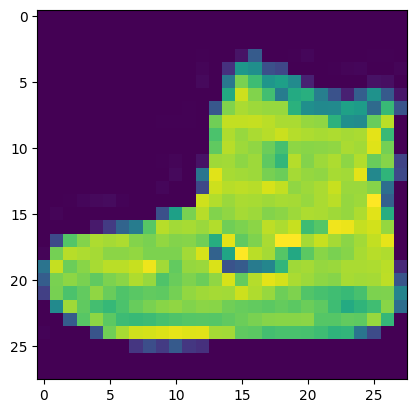

In [26]:
plt.imshow(X_train_full[0].reshape((28,28)))

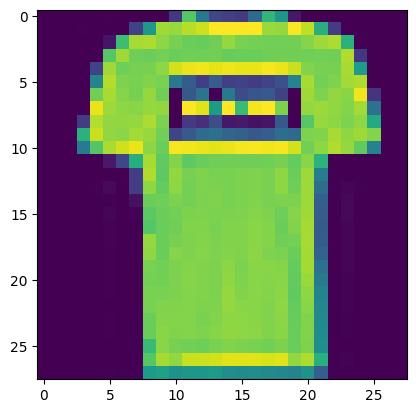

In [27]:
plt.imshow(X_train_full[1].reshape((28,28)))

Analysis some more images

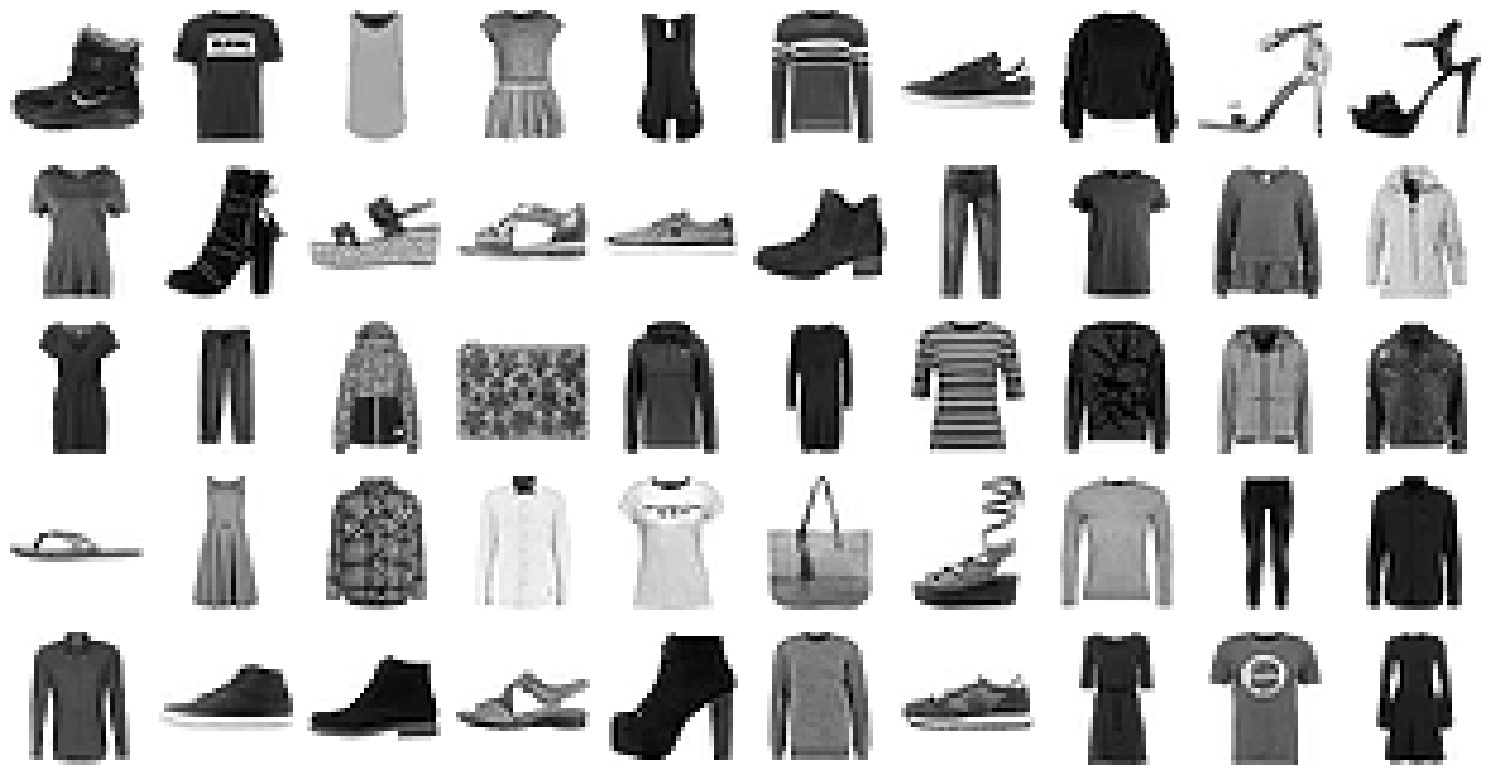

In [28]:
plt.figure(figsize=(15,8))
for i in range(50):
  plt.subplot(5,10,i+1)
  plt.imshow(X_train_full[i].reshape((28,28)), cmap='binary')
  plt.axis('off')
plt.tight_layout()
plt.show()

* Putting all features to range of 0-1, dividing pixels by 255
* Validation set - first 5000 images
* First 5000 images for validation and the rest 55k images for training.

In [35]:
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = Y_train_full[:5000], Y_train_full[5000:]

In [36]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

Although we have a separate test data file, We have made a separate validation dataset of 5000 images to check our own model's performance.


In [31]:
np.array(np.unique(y_train, return_counts=True)).T

array([[   0, 5543],
       [   1, 5444],
       [   2, 5496],
       [   3, 5499],
       [   4, 5512],
       [   5, 5507],
       [   6, 5507],
       [   7, 5488],
       [   8, 5510],
       [   9, 5494]])

In [39]:
## Assigning class names
class_names= ["T-shirt/Top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]

In [40]:
class_names[Y_train_full[6]]

'Sneaker'

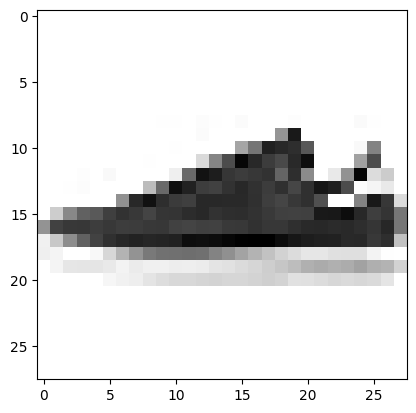

In [41]:
plt.imshow(X_train_full[6].reshape((28,28)), cmap='binary')

In [43]:
class_names[Y_train_full[5]]

'Pullover'

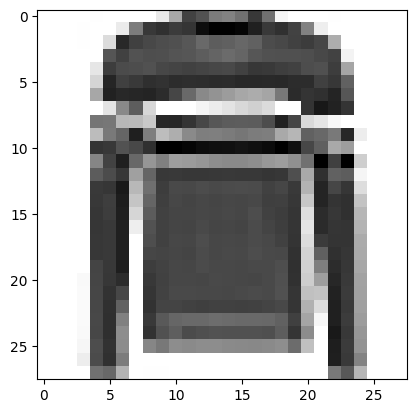

In [44]:
plt.imshow(X_train_full[5].reshape((28,28)), cmap='binary')

MODEL BUILDING

Step 1 : Defining the layers

In [48]:
model= keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape= [28,28])) ## converting 2d to 1d image
model.add(keras.layers.Dense(300, activation='relu')) ##relu takes the max(0,Pixel) so it negates any negative pixel
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax')) ## Softmax is generally used for multiclass problem


So, the inner layers (hidden layers) are totally experimental and you can try for different values (here, 300 and 100) but ultimately the output layers should be 10 as you're trying to classify into 10 categories of fashion types.

In [50]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_1 (Dense)             (None, 300)               235500    
                                                                 
 dense_2 (Dense)             (None, 100)               30100     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Step 2: Compilation

In [53]:
model.compile(loss= 'sparse_categorical_crossentropy', optimizer= 'sgd', metrics=["accuracy"])

For multi class labels, we can use Sparse Categorical Crossentropy which suits our problem statement.
If you want to read more:

https://keras.io/api/losses/probabilistic_losses/#sparsecategoricalcrossentropy-class

Step 3: Fit

In [54]:
history= model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.7072 - accuracy: 0.7706 - val_loss: 0.5147 - val_accuracy: 0.8182
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4873 - accuracy: 0.8289 - val_loss: 0.4403 - val_accuracy: 0.8504
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4434 - accuracy: 0.8464 - val_loss: 0.4347 - val_accuracy: 0.8452
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4161 - accuracy: 0.8547 - val_loss: 0.3926 - val_accuracy: 0.8636
Epoch 5/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3964 - accuracy: 0.8614 - val_loss: 0.3909 - val_accuracy: 0.8632
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3804 - accuracy: 0.8671 - val_loss: 0.3749 - val_accuracy: 0.8664
Epoch 7/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3672 - accuracy: 0.8715 - val_loss: 0.3656 - val_accuracy:

Notice losses are decreasing after every epoch and accuracy is increasing.

Step 4 : Evaluation

<Axes: >

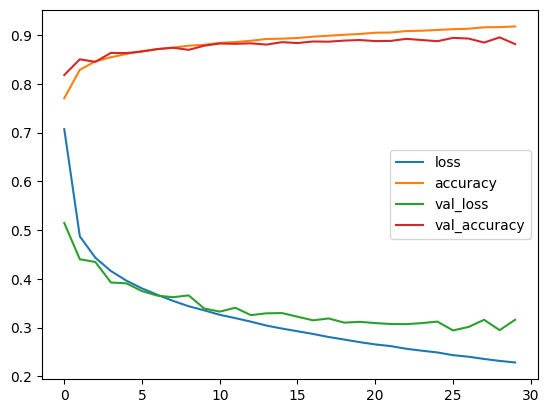

In [55]:
pd.DataFrame(history.history).plot()

In [56]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 4ms/step - loss: 62.8875 - accuracy: 0.8466


[62.887542724609375, 0.8465999960899353]

* Training accuracy : 0.9187
* Testing accuracy : 0.8465

In [57]:
X_new= X_test[:3]
model.predict(X_new)

1/1 [==============================] - 0s 297ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

What our model has predicted:
* Image 1 -> "Ankle boot"
* Image 2 -> pullover
* Image 3 -> trouser

Let's validate now

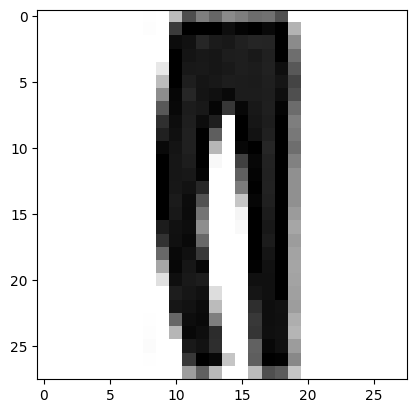

In [58]:
plt.imshow(X_new[2].reshape((28,28)), cmap='binary')

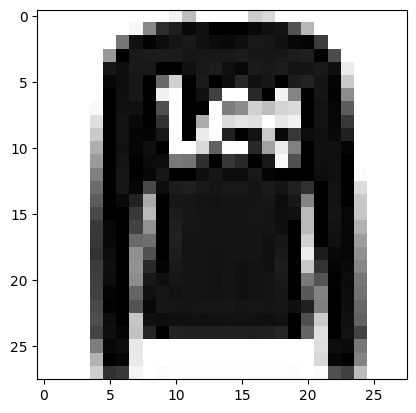

In [59]:
plt.imshow(X_new[1].reshape((28,28)), cmap='binary')

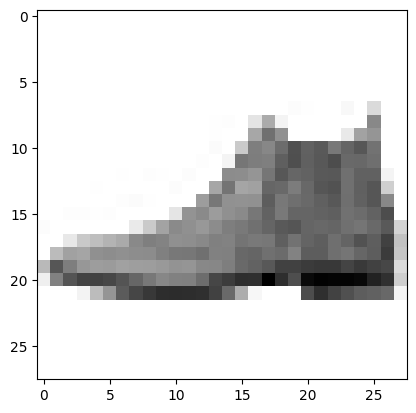

In [60]:
plt.imshow(X_new[0].reshape((28,28)), cmap='binary')

The model has predicted correctly

This is just a basic project using a simple neural network.
* Further Scope : Using CNN

# THANK YOU! HAPPY LEARNING!
Vikas Velmurugan